# Forecast bitcoin price using times series
https://www.kaggle.com/ayushi2/bitcoin-price-ar-ma-and-arima#Remove-trend-and-seasonality-with-decomposition
In this section, we are using a project from Kaggle to perform ARIMA model on the data set 
## Data Presentation


In [1]:
# import libraries
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re
#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
#loading the data set 
train = pd.read_csv('projectfile1.txt', sep= ",", parse_dates=['Date']).fillna(0)
print(train.head())

        Date     Open     High      Low    Close         Volume  \
0 2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1 2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2 2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4 2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  


In [3]:
# satistical description 
train.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


### Times Series representing Bitcoin's price
A time series is a set numerical measurements of a same entity taken at equally spaced interval over the time.  We can use the **trend** which is the overall direction of the series to define it. Moreover, we can often observe some repeated patterns at regular interval. This phenomena is called **seasonality**.
In our case the prices are taken **every day** between April 28, 2008 and July 31, 2017. We want to predict the the **highest price** of the Bitcoin.


In [4]:
data = train['High']
Date1 = train['Date']
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB
None


In [5]:
train1 = train[['Date','High']]
train1.head()

,Date,High
0,2017-07-31,2889.62
1,2017-07-30,2758.53
2,2017-07-29,2808.76
3,2017-07-28,2897.45
4,2017-07-27,2693.32


In [6]:
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
train2.head()

,High
Date,
2013-04-28,135.98
2013-04-29,147.49
2013-04-30,146.93
2013-05-01,139.89
2013-05-02,125.60


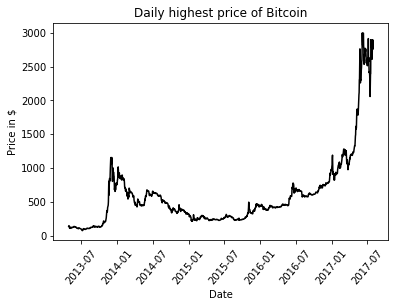

In [7]:
plt.plot(train2, color="black")
plt.xlabel("Date")
plt.ylabel("Price in $")
plt.title("Daily highest price of Bitcoin")
plt.xticks(rotation= 50)
plt.show()
#plt.savefig("DailyhighestpriceofBitcoin.png")

The figure above represents the higher price of bitcoin each day. It is easy to see that the over all trend is increasing, even if there are some local drops. Besides, it is hard to identify any seasonal patterns just by looking at this graph. 

### Augmented Dickey Fuller Test
 https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/
 
The **Augmented Dickey Test** is a test for the stationarity of the time series, it checks if the statistical properties of the series changes over the time. In other words, the ADF test is a **unit root test**, it implies the null hypothesis is the presence of unit root in the time series. Mathematically the unit root is defined as the sum of the deterministic component, the stochastic component and the stationary error process. The purpose of the basic unit test is to test if the stochastic component consist  of a unit root. 

Actually, since we have an increasing series the series should not be stationary. 


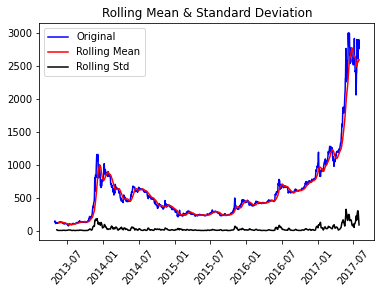

ADF Stastistic: 2.511750
p-value: 0.999054
The graph is non stationary 


In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    # in this step the authors the combination of the function rolling
    # and mean then rolling and std in order to compute the means and standard variation by month

    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation = 50)
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]> pvalue:
            print("The graph is non stationary ")
            break
        else:
            print("The graph is stationary " )
        
ts = train2['High'] 
test_stationarity(ts)

In the Figure aboave we reprensented the variation of the mean's and standard deviation's variations over the time. Since the ADF statistic is greater than the p-value we are failling to reject the null hypothesis. There is an unit root in the time series, so it is not stationnary. Actually, the fact that the series is not stationnary make the prediction harder. So, we try to flattern the curve by using the log of the curve.

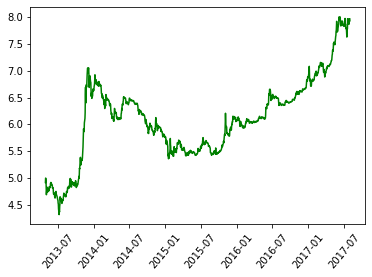

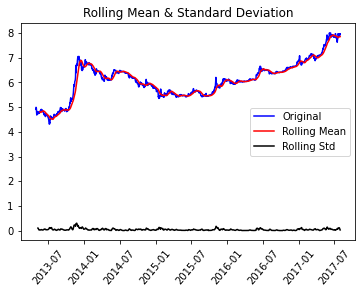

ADF Stastistic: -0.685431
p-value: 0.850487
The graph is stationary 
The graph is stationary 
The graph is stationary 


In [9]:
ts_log = np.log(ts)
plt.plot(ts_log, color="green")
plt.xticks(rotation =50)
plt.show()
test_stationarity(ts_log)

So we are going to perform the prediction on the log.
